In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.express as px
%matplotlib inline
warnings.filterwarnings('ignore')
from IPython.display import HTML
import plotly.express as px

Output hidden; open in https://colab.research.google.com to view.

Plotly's Python graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
Plotly.py is free and open source.

In [2]:
stream_df = pd.read_csv('/content/moviestreams.csv')

In [3]:
stream_df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


**Data Cleaning**

In [4]:
df = stream_df.copy()

In [5]:
# df['Age'] = df['Age'].fillna('all') if you want the null values to fill with any string
df['Age'] = df['Age'].str.replace('0', 'All')
df['Age'] = df['Age'].str.replace('+', '')
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace('%', '')

In [6]:
df['Age'].value_counts()

18     3474
7      1462
13     1255
all     843
16      320
Name: Age, dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [8]:
df.drop(columns =['Unnamed: 0', 'ID'], inplace = True)

## Movies Count as per Ages

In [9]:
a = df.Age.value_counts()
a.index # will print the first column 
a.values # will print its values
df_age = pd.DataFrame(a.index)
df_age['count'] = pd.DataFrame(a.values)
df_age

,0,count
0,18,3474
1,7,1462
2,13,1255
3,all,843
4,16,320


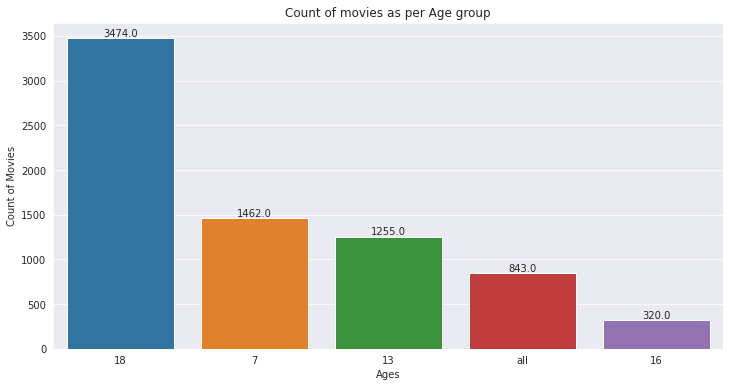

In [10]:
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
graph = sns.barplot(df_age[0], df_age['count'])
graph.set(xlabel = "Ages", ylabel = 'Count of Movies', title = 'Count of movies as per Age group');
for i in graph.patches:
  graph.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2,
                    i.get_height()),ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

Our steps will be:

Iterate over the bars
1. Get the x-axis position(x) and the width(w) of the bar this will help us to get the x coordinate of the text i.e. get_x()+get_width()/2.
2. The y-coordinate(y) of the text can be found using the height of the bar i.e. get_height()
3. So we have the coordinates of the annotation value i.e. get_x()+get_width()/2, get_height()
4. But this will print the annotation exactly on the boundary of the bar so to get a more pleasing annotated plot we use the paramete xyplot=(0, 8). Here 8 denotes the pixels that will be left from the top of the bar. Therefore to go below the barline we can use xy=(0,-8).

In [53]:
import plotly.express as px
fig = px.bar(stream_df, x = stream_df['Age'].value_counts().index, y = stream_df['Age'].value_counts().values, title ='Movies Streaming as per Age',
             text = stream_df['Age'].value_counts().values)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

##Top 10 languages movie streaming 

In [12]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13,8.8,87,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18,8.7,87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13,8.5,84,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7,8.5,96,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18,8.8,97,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [13]:
# this will groupby all the language and count the number of its occurrence
languages = df['Language'].value_counts().head(10)

Text(0, 0.5, 'Movies Count')

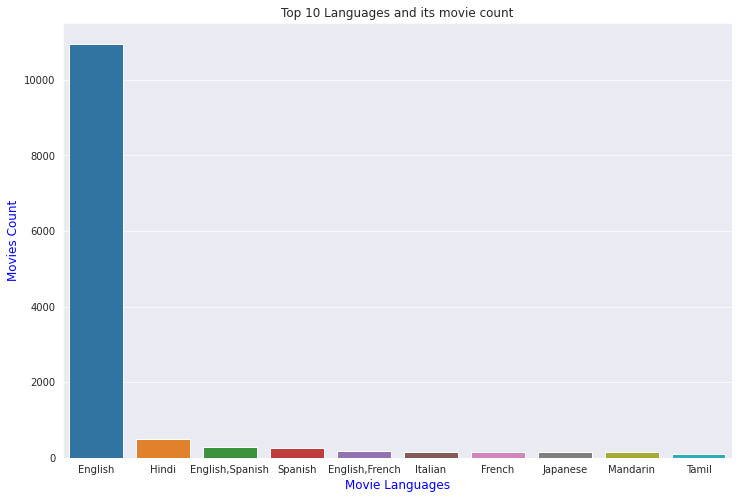

In [14]:
# Bar Plot 
plt.figure(figsize = (12,8))
graph = sns.barplot(languages.index, languages.values)
graph.set(title = 'Top 10 Languages and its movie count')
graph.set_xlabel('Movie Languages', color = 'Blue', size =12)
graph.set_ylabel('Movies Count', color = 'Blue', size =12)

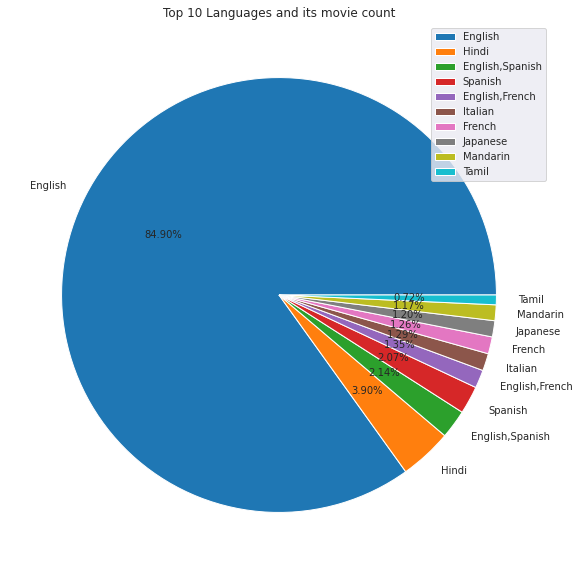

In [15]:
# Pie Plot for the same 
plt.figure(figsize = (15,10))
plt.pie(languages.values, labels = languages.index, autopct='%1.2f%%')
plt.title ('Top 10 Languages and its movie count')
plt.legend()

In [16]:
#pieplot using another library
from IPython.display import HTML
import plotly.express as px
fig = px.pie(df, 
             values=languages.values, 
             names=languages.index, 
             title='Top 10 languages in Streaming Services',
             height=600)
HTML(fig.to_html())


Output hidden; open in https://colab.research.google.com to view.

**Number of Movies in specific age group in Netflix**

In [17]:
# Datframe for netflix streaming movies
netflix = df[df['Netflix'] == 1]

In [18]:
netflix['Age'].unique()

array(['13', '18', '7', nan, 'all', '16'], dtype=object)

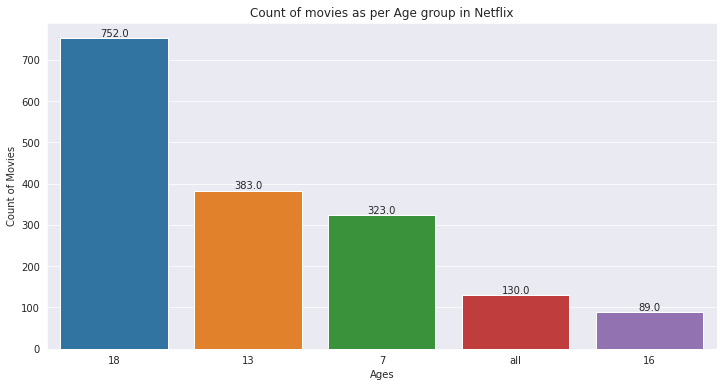

In [19]:
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
graph = sns.barplot(netflix['Age'].value_counts().index, netflix['Age'].value_counts().values)
graph.set(xlabel = "Ages", ylabel = 'Count of Movies', title = 'Count of movies as per Age group in Netflix');
for i in graph.patches:
  graph.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2,
                    i.get_height()),ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

**Number of Movies in specific age group in Amazon Prime**

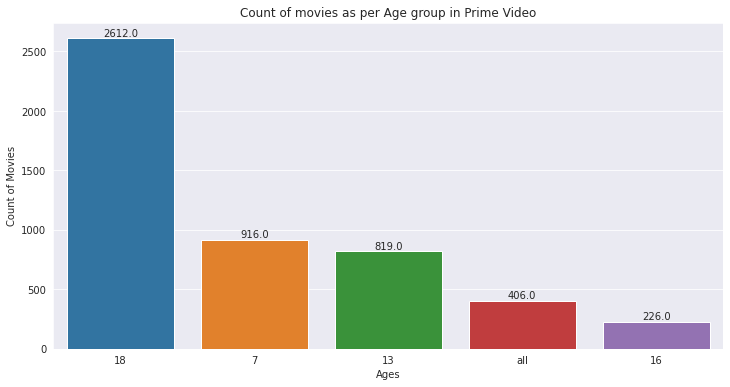

In [20]:
amazon_prime = df[df['Prime Video'] == 1]
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
graph = sns.barplot(amazon_prime['Age'].value_counts().index, amazon_prime['Age'].value_counts().values)
graph.set(xlabel = "Ages", ylabel = 'Count of Movies', title = 'Count of movies as per Age group in Prime Video');
for i in graph.patches:
  graph.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2,
                    i.get_height()),ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

**Number of Movies in specific age group in HULU**


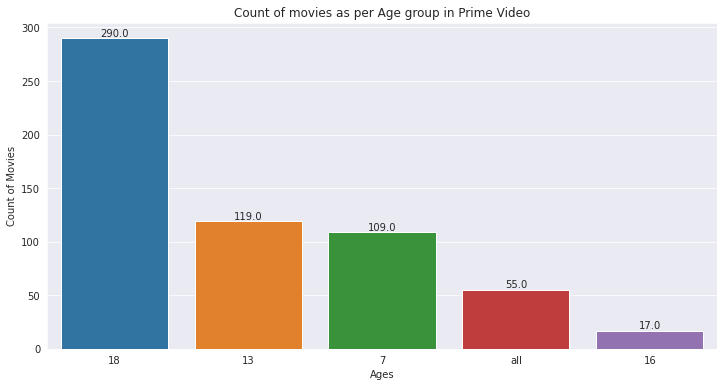

In [21]:
Hulu = df[df['Hulu'] == 1]
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
graph = sns.barplot(Hulu['Age'].value_counts().index, Hulu['Age'].value_counts().values)
graph.set(xlabel = "Ages", ylabel = 'Count of Movies', title = 'Count of movies as per Age group in Prime Video');
for i in graph.patches:
  graph.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2,
                    i.get_height()),ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

**Number of Movies in specific age group in Disney+**

---



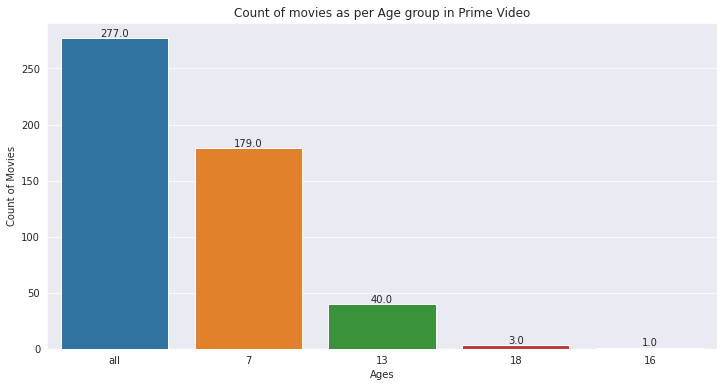

In [22]:
disney = df[df['Disney+'] == 1]
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
graph = sns.barplot(disney['Age'].value_counts().index, disney['Age'].value_counts().values)
graph.set(xlabel = "Ages", ylabel = 'Count of Movies', title = 'Count of movies as per Age group in Prime Video');
for i in graph.patches:
  graph.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2,
                    i.get_height()),ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

**Rotten Tomatoes**

In [23]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13,8.8,87,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18,8.7,87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13,8.5,84,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7,8.5,96,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18,8.8,97,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [24]:
df['Rotten Tomatoes'].value_counts()

100    407
80     162
50     136
83     131
67     126
      ... 
7       10
28      10
4        9
3        4
2        4
Name: Rotten Tomatoes, Length: 99, dtype: int64

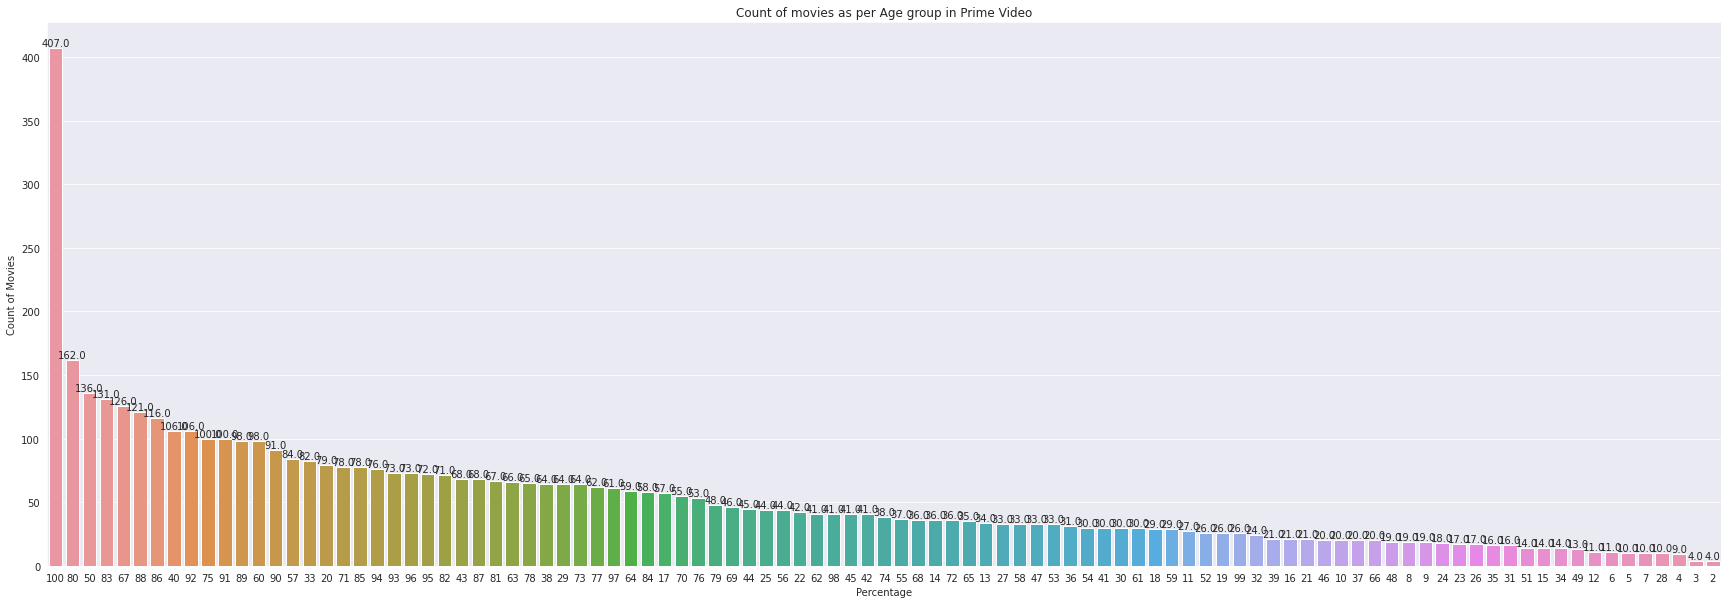

In [25]:
plt.figure(figsize = (30,10))
sns.set_style('darkgrid')
graph = sns.barplot(df['Rotten Tomatoes'].value_counts().index, df['Rotten Tomatoes'].value_counts())
graph.set(xlabel = "Percentage", ylabel = 'Count of Movies', title = 'Count of movies as per Age group in Prime Video');
for i in graph.patches:
  graph.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2,
                    i.get_height()),ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

In [26]:
# using plotly

fig = px.bar(df, 
             x=df['Rotten Tomatoes'].value_counts().index, 
             y=df['Rotten Tomatoes'].value_counts(),
             title="Overall Rotten Tomato Ratings",
             text=df['Rotten Tomatoes'].value_counts(), 
             height=600)
fig.update_traces(marker_color='red',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

##Rotten tomatoes based on streaming Services

In [27]:
rt_scores = pd.DataFrame({'Streaming Service' : ["Prime Video", "Hulu","Disney+","NetFlix"],'Rotten Tomatoes Score' : [amazon_prime['Rotten Tomatoes'].value_counts()[0],
                         Hulu['Rotten Tomatoes'].value_counts()[0],
                         disney['Rotten Tomatoes'].value_counts()[0],
                         netflix['Rotten Tomatoes'].value_counts()[0]]})

In [28]:
rt_scores = rt_scores.sort_values(by = 'Rotten Tomatoes Score', ascending = False)

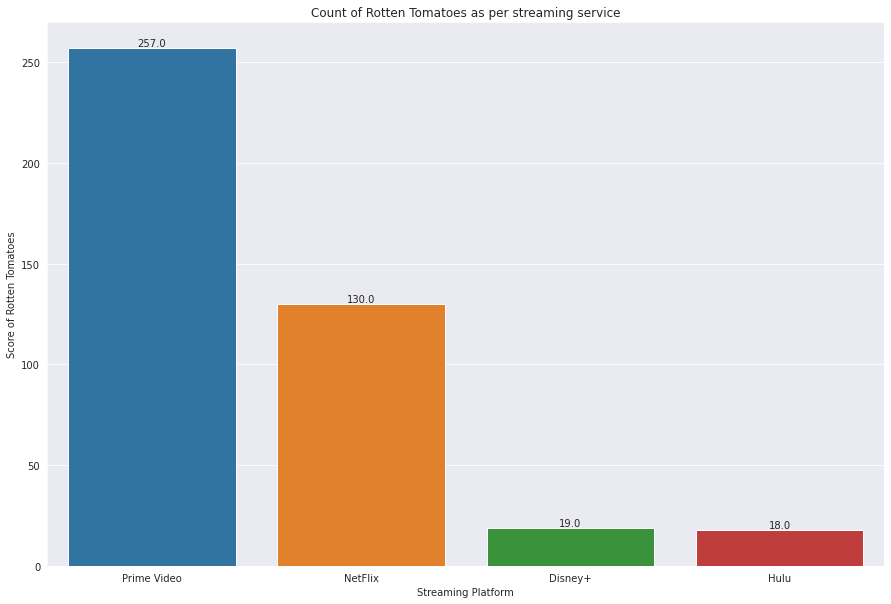

In [29]:
plt.figure(figsize = (15,10))
sns.set_style('darkgrid')
graph = sns.barplot(rt_scores['Streaming Service'], rt_scores['Rotten Tomatoes Score'])
graph.set(xlabel = "Streaming Platform", ylabel = 'Score of Rotten Tomatoes', title = 'Count of Rotten Tomatoes as per streaming service');
for i in graph.patches:
  graph.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2,
                    i.get_height()),ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

## IMDB Ratings

In [30]:
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime'],
      dtype='object')

In [31]:
top_10_IMDb = df['IMDb'].value_counts().sort_values(ascending = False).head(10)

In [59]:
top_10_IMDb = top_10_IMDb.sort_values(ascending= False)
top_10_IMDb.index = top_10_IMDb.index.astype(str) # coverting it to string as in x label it will take with ascending order
type(top_10_IMDb.index)

pandas.core.indexes.base.Index

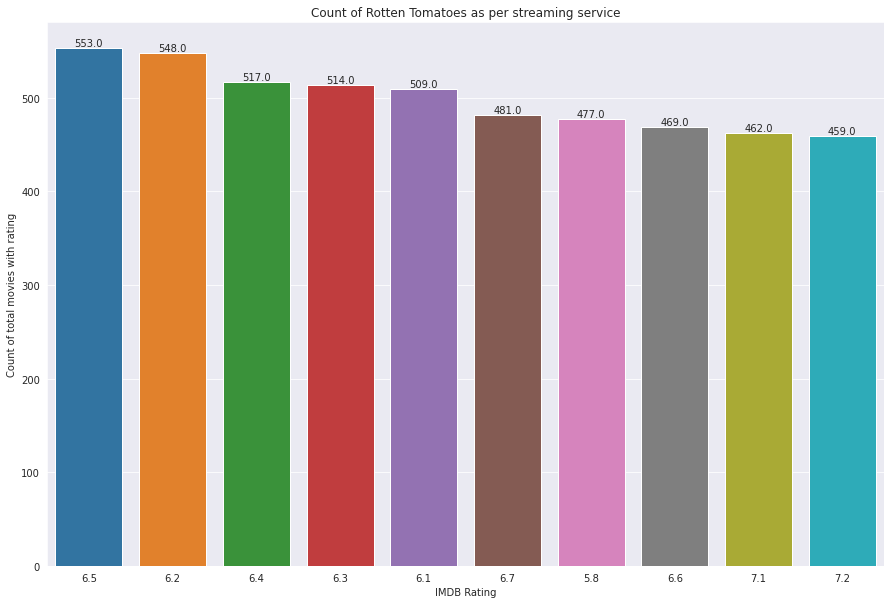

In [60]:
plt.figure(figsize = (15,10))
sns.set_style('darkgrid')
graph = sns.barplot(top_10_IMDb.index, top_10_IMDb.values)
graph.set(xlabel = "IMDB Rating", ylabel = 'Count of total movies with rating', title = 'Count of Rotten Tomatoes as per streaming service');
for i in graph.patches:
  graph.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2,
                    i.get_height()),ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

##Top 10 count most runtime Of Movies

In [34]:
Top10Runtime = df['Runtime'].value_counts().head(10)

In [35]:
Top10Runtime

90.0     971
95.0     489
92.0     434
93.0     422
85.0     408
89.0     407
88.0     406
100.0    402
91.0     394
94.0     383
Name: Runtime, dtype: int64

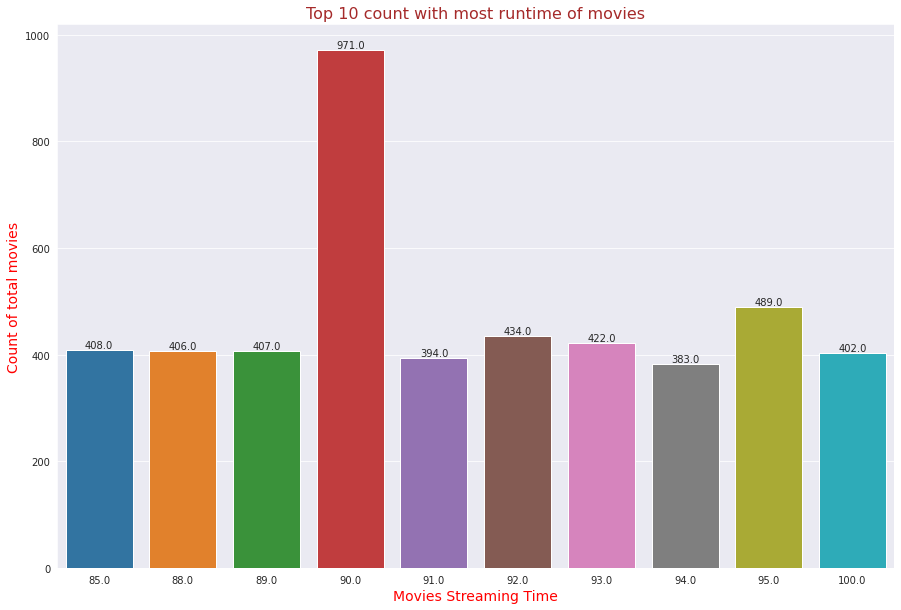

In [64]:
# Top 10 Directors with Highest movies Directed
plt.figure(figsize = (15,10))
sns.set_style('darkgrid')
graph = sns.barplot(Top10Runtime.index, Top10Runtime.values)
graph.set_title('Top 10 count with most runtime of movies', size = 16, color = 'Brown');
graph.set_xlabel("Movies Streaming Time" , color = 'Red', size =14)
graph.set_ylabel("Count of total movies" , color = 'Red', size =14)
for i in graph.patches:
  graph.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2,
                    i.get_height()),ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

##Directors And Their Count Of Movies They Have Directed

In [36]:
directors = df['Directors'].value_counts()

In [37]:
directors_df = pd.DataFrame(directors)

In [38]:
directors_df['Movies Count'] = directors_df['Directors']
directors_df['Directors'] = directors_df.index

In [39]:
directors_df

,Directors,Movies Count
Jay Chapman,Jay Chapman,36
Joseph Kane,Joseph Kane,30
Cheh Chang,Cheh Chang,26
Jim Wynorski,Jim Wynorski,22
Sam Newfield,Sam Newfield,22
...,...,...
Melville Shavelson,Melville Shavelson,1
"S.S. Balan,S.S. Vasan","S.S. Balan,S.S. Vasan",1
"Josh Ashy Holden,Nick Holden","Josh Ashy Holden,Nick Holden",1
Stephen Marro,Stephen Marro,1


In [40]:
directors_df = directors_df.reset_index(drop = True).head(20)

In [41]:
directors_df

,Directors,Movies Count
0,Jay Chapman,36
1,Joseph Kane,30
2,Cheh Chang,26
3,Jim Wynorski,22
4,Sam Newfield,22
5,William Beaudine,21
6,David DeCoteau,21
7,"Raúl Campos,Jan Suter",20
8,Jay Karas,20
9,Marcus Raboy,18


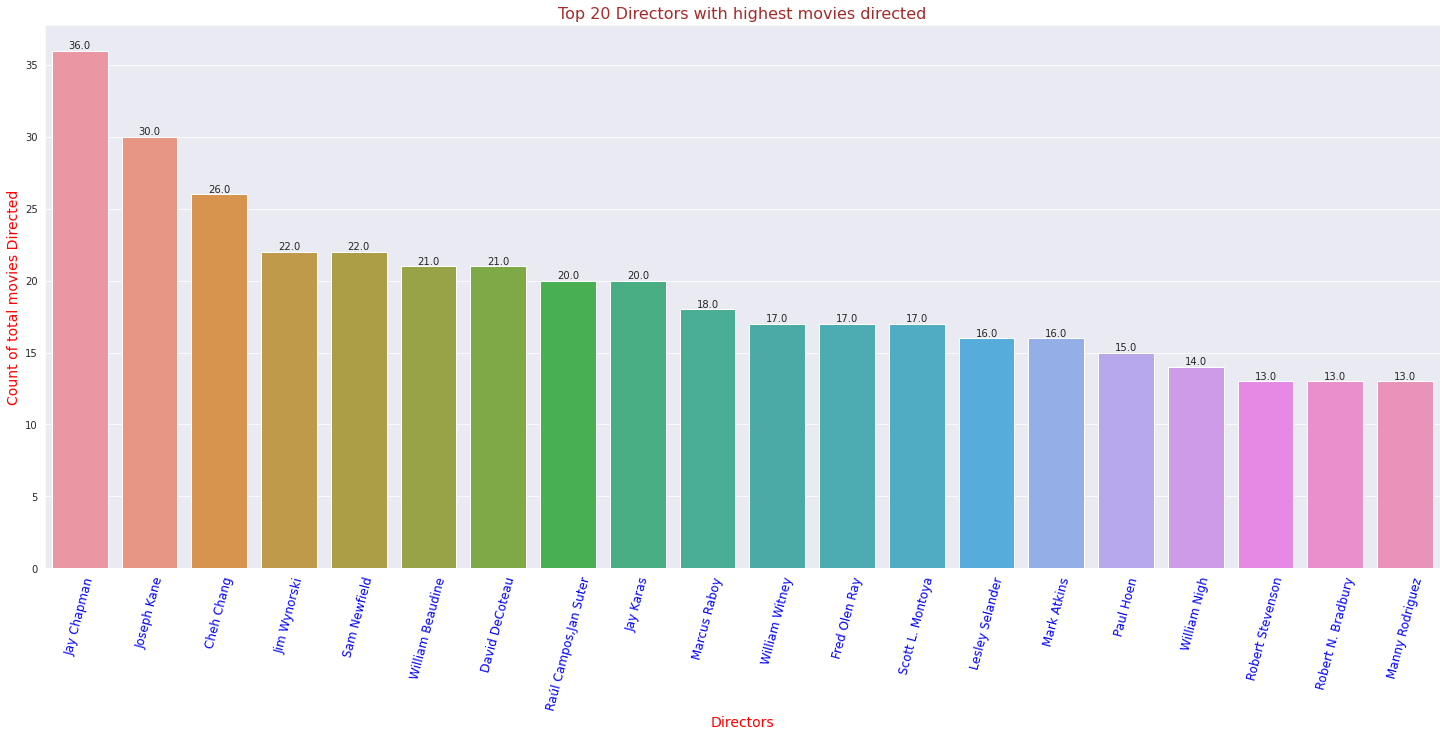

In [65]:
# Top 20 Directors with highest movies directed
plt.figure(figsize = (25,10))
sns.set_style('darkgrid')
graph = sns.barplot(directors_df['Directors'], directors_df['Movies Count'])
graph.set_title('Top 20 Directors with highest movies directed', size = 16, color = 'Brown');
graph.set_xlabel("Directors" , color = 'Red', size =14)
graph.set_ylabel("Count of total movies Directed" , color = 'Red', size =14)
plt.xticks(rotation = 75, color = 'blue', size = 12)
for i in graph.patches:
  graph.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2,
                    i.get_height()),ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

**Type of most movies directed by Chapman**


In [66]:
chapman = df[df['Directors'] == 'Jay Chapman'][['Title','Genres', 'Language', 'Age']]
chapman['Genres'].value_counts()

Comedy                28
Documentary,Comedy     8
Name: Genres, dtype: int64

As we can see Chapman mostly directs comedy movies

##Top 10 Genres

In [44]:
Top_10_genres = df['Genres'].value_counts().head(10)
Top_10_genres_df = pd.DataFrame(Top_10_genres)
Top_10_genres_df = Top_10_genres_df.reset_index()
Top_10_genres_df.columns = ['Genres', 'Movies Count']
Top_10_genres_df

,Genres,Movies Count
0,Drama,1341
1,Documentary,1229
2,Comedy,1040
3,"Comedy,Drama",446
4,Horror,436
5,"Drama,Romance",397
6,"Comedy,Drama,Romance",333
7,"Horror,Thriller",297
8,"Comedy,Romance",289
9,"Drama,Thriller",222


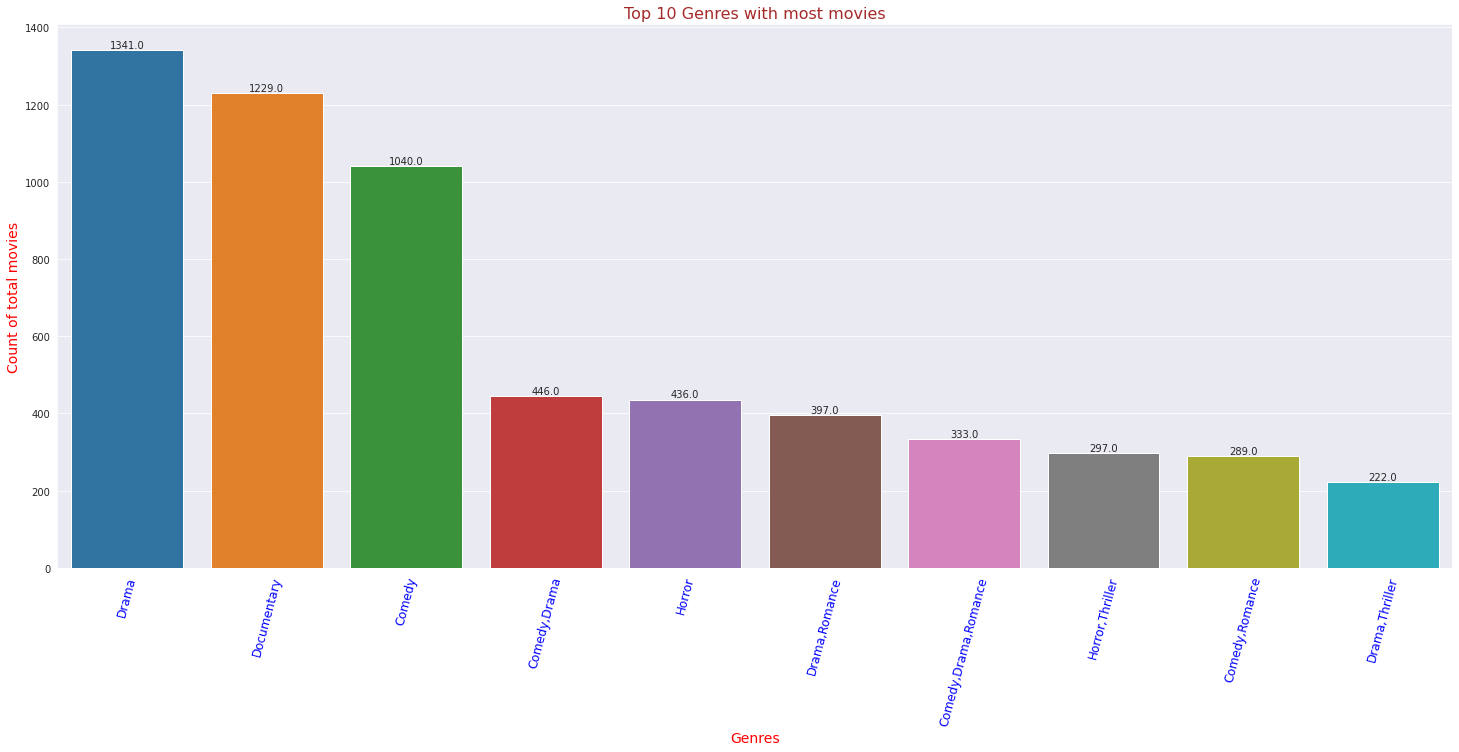

In [45]:
# Top 10 Genres with most movies
plt.figure(figsize = (25,10))
sns.set_style('darkgrid')
graph = sns.barplot(Top_10_genres_df['Genres'], Top_10_genres_df['Movies Count'])
graph.set_title('Top 10 Genres with most movies', size = 16, color = 'Brown');
graph.set_xlabel("Genres" , color = 'Red', size =14)
graph.set_ylabel("Count of total movies" , color = 'Red', size =14)
plt.xticks(rotation = 75, color = 'blue', size = 12)
for i in graph.patches:
  graph.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2,
                    i.get_height()),ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

## Average Runtime on each service 

In [46]:
avg_runtime = pd.DataFrame({'Services' : ['Netflix', 'Hulu', 'Disney', 'Prime Videos'],
                            'Average Runtime' : [netflix['Runtime'].mean(),
                                                 Hulu['Runtime'].mean(),
                                                 disney['Runtime'].mean(),
                                                 amazon_prime['Runtime'].mean()]})
avg_runtime

,Services,Average Runtime
0,Netflix,98.912900
1,Hulu,97.396610
2,Disney,90.425225
3,Prime Videos,92.293980


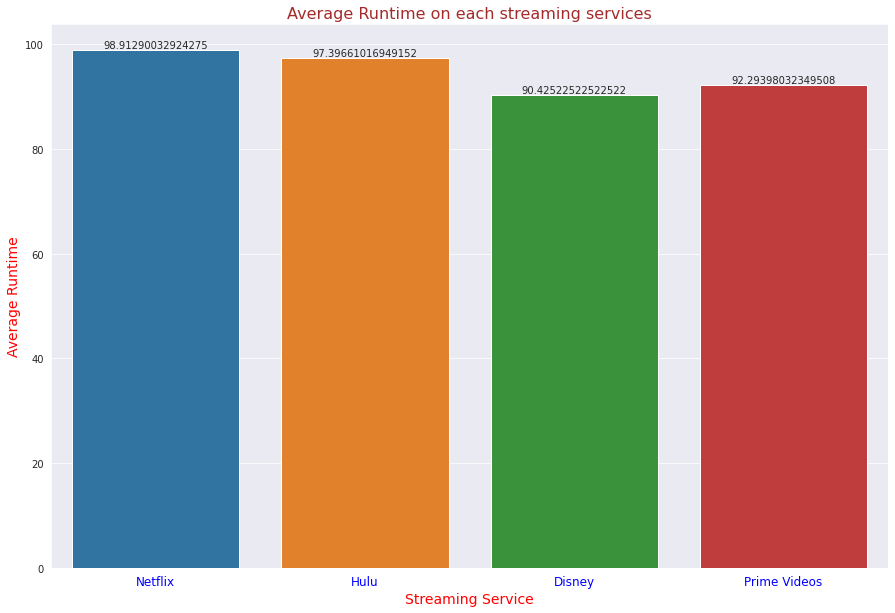

In [70]:
# Average Runtime on each streaming services
plt.figure(figsize = (15,10))
sns.set_style('darkgrid')
graph = sns.barplot(avg_runtime['Services'], avg_runtime['Average Runtime'])
graph.set_title('Average Runtime on each streaming services', size = 16, color = 'Brown');
graph.set_xlabel("Streaming Service" , color = 'Red', size =14)
graph.set_ylabel("Average Runtime" , color = 'Red', size =14)
plt.xticks(color = 'blue', size = 12)
for i in graph.patches:
  graph.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2,
                    i.get_height()),ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

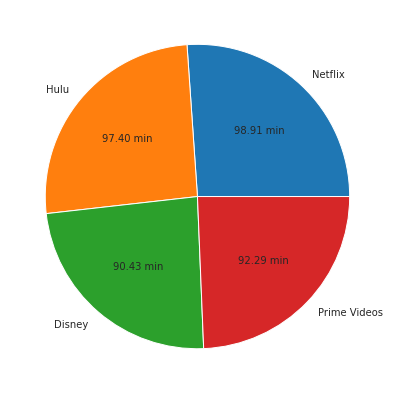

In [134]:
plt.figure(figsize =(12,7))
plt.pie(avg_runtime['Average Runtime'], labels= avg_runtime['Services'], autopct= lambda p:'{0:.2f} min'.format(p*avg_runtime['Average Runtime'].sum()/100));

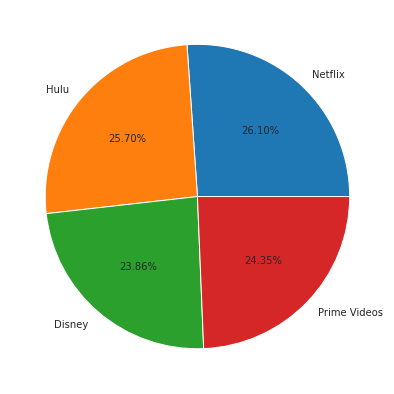

In [131]:
plt.figure(figsize = (12,7))
plt.pie(avg_runtime['Average Runtime'], labels= avg_runtime['Services'], autopct= '%1.2f%%');

In [110]:
avg_runtime['Average Runtime'].sum()

379.02871604745457

In [48]:
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime'],
      dtype='object')

In [49]:
before_1990 = df[df['Year'] < 1990][['Title']]

In [50]:
before_1990

,Title
3,Back to the Future
4,"The Good, the Bad and the Ugly"
8,Raiders of the Lost Ark
10,Taxi Driver
14,Monty Python and the Holy Grail
...,...
16732,The Boy Who Talked to Badgers
16734,Sultan And The Rock Star
16737,The Bears and I
16739,The Ghosts of Buxley Hall
